# Can artists be predicted according to their tunes' features?

For this predictive model, we will focus on Spotify. Using one of Spotify's multiple APIs, the goal will be to get the features of the songs of 3 or 4 artists, create a dataframe with them and finally predict if, based on those features, we can deduce which artist each song belongs to.

The API in question is called "Get Track's Audio Features", and it will give us several variables such as: danceability, energy, key, loudness, or instrumentalness, among others. Along with it, we will use another API through which we will obtain the name of the song, the name of the artist and the year of release.

This code has been possible thanks to: Spotify (https://developer.spotify.com/console/get-audio-features-track/?id=5t5LFepMdws4nudg1EiWdd), Samantha Jones (https://www.linkedin.com/pulse/extracting-your-fav-playlist-info-spotifys-api-samantha-jones/), and my colleague Mark O'Connell together with whom, we were able to get the necessary information for our respective models as both our focuses were on Spotify.



### Obtain the data from Spotify's API

client_ID = '53de192999e24fbb89e47897b43a63ba'

client_secret = '8a9395120d5645f0ae3de8e46463d6af'

import requests

import spotipy

from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd


client_credentials_manager = SpotifyClientCredentials(client_id=client_ID, client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

#### Chosen artists

Queen, Chopin, Louis Prima, Foo Fighters, Bob Sinclar, ELO, Gypsy Kings, Dua Lipa, Daddy Yankee, Monsta X

Below, there's the code to collect the playlists made by Spotify about each of those artists mentioned above. The playlists are called: "This is _artist name_".

#creating list of the playlist IDs

playlist_ids = ["37i9dQZF1DWV7cvDzE3MOI", "37i9dQZF1DZ06evO2XsYVf", "37i9dQZF1DZ06evO4kqwHC", "37i9dQZF1DZ06evO3wyTPW", "37i9dQZF1DZ06evO4keHBe", "37i9dQZF1DX3fRquEp6m8D", "37i9dQZF1DZ06evO2TweiY", "0w9o2JheT4jJgOujiMTgum", "37i9dQZF1DX44JzWntsLKr"]


def get_playlist(creator, id):
    #create an empty list and dataframe for all the track data
    
    track_data =  ["TrackName","TrackID","release_date","artist","acousticness","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    playlist_df = pd.DataFrame(columns = track_data)

    #loop through the playlist extracting the desired features
    playlist = sp.user_playlist_tracks(creator, id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get track data
        playlist_features["TrackName"] = track["track"]["name"]
        playlist_features["TrackID"] = track["track"]["id"]
        playlist_features["release_date"] = track["track"]["album"]["release_date"]
        playlist_features["artist"] = track["track"]["artists"][0]["name"]

        #get track audio features from second API endpoint
        audio_features = sp.audio_features(playlist_features["TrackID"])[0]
        for feature in track_data[5:]:
            playlist_features[feature] = audio_features[feature]

        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

#running once to create the csv file with the headers

get_playlist("spotify",'37i9dQZF1DZ06evO0ENBD2').to_csv('spotifydata.csv', index=False)

#looping through the rest of the playlist IDs to append them to the csv file without headers

for i in playlist_ids:
   
       get_playlist("spotify",i).to_csv('spotifydata.csv', index=False, mode='a', header=False)

# Import data

Here I import the csv file created in the previous file using Spotify's API

In [130]:
import requests
import pandas as pd

In [131]:
df = pd.read_csv('spotifydata.csv')
df

,TrackName,TrackID,release_date,artist,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Another One Bites The Dust - Remastered 2011,5vdp5UmvTsnMEMESIF2Ym7,1980-06-27,Queen,NaN,0.933,0.528,5,-6.472,0,0.1610,0.312000,0.1630,0.754,109.967,214653,4
1,Bohemian Rhapsody - Remastered 2011,4u7EnebtmKWzUH433cf5Qv,1975-11-21,Queen,NaN,0.414,0.404,0,-9.928,0,0.0499,0.000000,0.3000,0.224,71.105,354320,4
2,Don't Stop Me Now - Remastered 2011,5T8EDUDqKcs6OSOwEsfqG7,1978-11-10,Queen,NaN,0.559,0.868,5,-5.276,1,0.1700,0.000176,0.7760,0.609,156.295,209413,4
3,Under Pressure - Remastered 2011,2fuCquhmrzHpu5xcA1ci9x,1982-05-03,Queen,NaN,0.671,0.712,2,-7.815,1,0.0476,0.000000,0.1030,0.462,113.805,248440,4
4,We Will Rock You - Remastered 2011,4pbJqGIASGPr0ZpGpnWkDn,1977-10-28,Queen,NaN,0.692,0.497,2,-7.316,1,0.1190,0.000000,0.2590,0.475,81.308,122067,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,No Reason,6zSXg2Ejji6GcwvjGTgK60,2019-02-18,Monsta X,NaN,0.677,0.889,0,-4.311,1,0.0310,0.000000,0.0709,0.680,105.991,204941,4
607,All I Do,65qvZNR4wUWFJrNHHQBkTs,2017-03-21,Monsta X,NaN,0.663,0.938,6,-2.233,1,0.0563,0.000000,0.0257,0.889,122.006,218059,4
608,악몽,4sp4wcAMElt3t7rQ1M9am6,2019-02-18,Monsta X,NaN,0.616,0.899,1,-4.404,0,0.2660,0.000000,0.0520,0.464,155.264,208660,4
609,Incomparable,1z7cjsOaKkcEnNMVkFS3fU,2017-06-19,Monsta X,NaN,0.394,0.854,7,-3.628,0,0.1270,0.000000,0.1410,0.531,138.580,223827,4


# Data Cleaning

## Clean artists

Due to the amazing featurings and collaborations among artists, some of the names appearing on our dataframe don't correspond to the artists we want to focus on. That is why, we remove those lines from our data so we have a clean focused dataframe.

In [132]:
df['artist'].value_counts()

Monsta X                     98
Gipsy Kings                  95
Frédéric Chopin              66
Queen                        50
Foo Fighters                 50
Louis Prima                  49
Electric Light Orchestra     49
Bob Sinclar                  42
Dua Lipa                     35
Daddy Yankee                 27
André Reyes                   3
Nicky Jam                     2
Anuel AA                      2
Sech                          2
Bad Bunny                     2
Ozuna                         2
Miley Cyrus                   1
Brytiago                      1
Olivia Newton-John            1
Luis Fonsi                    1
Steen Thottrup                1
Wisin                         1
Alexio                        1
Elton John                    1
Calvin Harris                 1
Camila Cabello                1
Sean Paul                     1
Dimitri Vegas & Like Mike     1
Steve Aoki                    1
Africanism                    1
Thor                          1
J Balvin

In [133]:
artists = ['Queen', 'Frédéric Chopin', 'Louis Prima', 'Foo Fighters', 'Bob Sinclar', 'Electric Light Orchestra', "Dua Lipa", "Daddy Yankee", "Monsta X", "Gipsy Kings"]

df = df[df['artist'].isin(artists)]

df['artist'].value_counts()


Monsta X                    98
Gipsy Kings                 95
Frédéric Chopin             66
Foo Fighters                50
Queen                       50
Electric Light Orchestra    49
Louis Prima                 49
Bob Sinclar                 42
Dua Lipa                    35
Daddy Yankee                27
Name: artist, dtype: int64

## Clean dates

Some of the dates have year/month/day, and others just year. Besides, because of the type of data we need, it would be enough to stick to the year.

In [134]:
df['release_date'] = pd.to_datetime(df['release_date']).dt.year
df

<ipython-input-134-a46e389ca1dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,TrackName,TrackID,release_date,artist,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Another One Bites The Dust - Remastered 2011,5vdp5UmvTsnMEMESIF2Ym7,1980,Queen,NaN,0.933,0.528,5,-6.472,0,0.1610,0.312000,0.1630,0.754,109.967,214653,4
1,Bohemian Rhapsody - Remastered 2011,4u7EnebtmKWzUH433cf5Qv,1975,Queen,NaN,0.414,0.404,0,-9.928,0,0.0499,0.000000,0.3000,0.224,71.105,354320,4
2,Don't Stop Me Now - Remastered 2011,5T8EDUDqKcs6OSOwEsfqG7,1978,Queen,NaN,0.559,0.868,5,-5.276,1,0.1700,0.000176,0.7760,0.609,156.295,209413,4
3,Under Pressure - Remastered 2011,2fuCquhmrzHpu5xcA1ci9x,1982,Queen,NaN,0.671,0.712,2,-7.815,1,0.0476,0.000000,0.1030,0.462,113.805,248440,4
4,We Will Rock You - Remastered 2011,4pbJqGIASGPr0ZpGpnWkDn,1977,Queen,NaN,0.692,0.497,2,-7.316,1,0.1190,0.000000,0.2590,0.475,81.308,122067,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,No Reason,6zSXg2Ejji6GcwvjGTgK60,2019,Monsta X,NaN,0.677,0.889,0,-4.311,1,0.0310,0.000000,0.0709,0.680,105.991,204941,4
607,All I Do,65qvZNR4wUWFJrNHHQBkTs,2017,Monsta X,NaN,0.663,0.938,6,-2.233,1,0.0563,0.000000,0.0257,0.889,122.006,218059,4
608,악몽,4sp4wcAMElt3t7rQ1M9am6,2019,Monsta X,NaN,0.616,0.899,1,-4.404,0,0.2660,0.000000,0.0520,0.464,155.264,208660,4
609,Incomparable,1z7cjsOaKkcEnNMVkFS3fU,2017,Monsta X,NaN,0.394,0.854,7,-3.628,0,0.1270,0.000000,0.1410,0.531,138.580,223827,4


## Cleaning variables

First Variables we're gonna work with. As we can observe on the frame above, some contain empty values (NaN), some other variables are not relevant such as TrackID.



In [135]:
df = df[['artist','release_date', 'danceability', 'energy', 'key', "loudness", "mode", "speechiness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]]
df.head()


,artist,release_date,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Queen,1980,0.933,0.528,5,-6.472,0,0.1610,0.312000,0.163,0.754,109.967,214653,4
1,Queen,1975,0.414,0.404,0,-9.928,0,0.0499,0.000000,0.300,0.224,71.105,354320,4
2,Queen,1978,0.559,0.868,5,-5.276,1,0.1700,0.000176,0.776,0.609,156.295,209413,4
3,Queen,1982,0.671,0.712,2,-7.815,1,0.0476,0.000000,0.103,0.462,113.805,248440,4
4,Queen,1977,0.692,0.497,2,-7.316,1,0.1190,0.000000,0.259,0.475,81.308,122067,4


In [136]:
df['artist'].value_counts()

Monsta X                    98
Gipsy Kings                 95
Frédéric Chopin             66
Foo Fighters                50
Queen                       50
Electric Light Orchestra    49
Louis Prima                 49
Bob Sinclar                 42
Dua Lipa                    35
Daddy Yankee                27
Name: artist, dtype: int64

# Exploratory Data Analysis

In [137]:
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
import math
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statistics import mean
from fractions import Fraction as fr
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

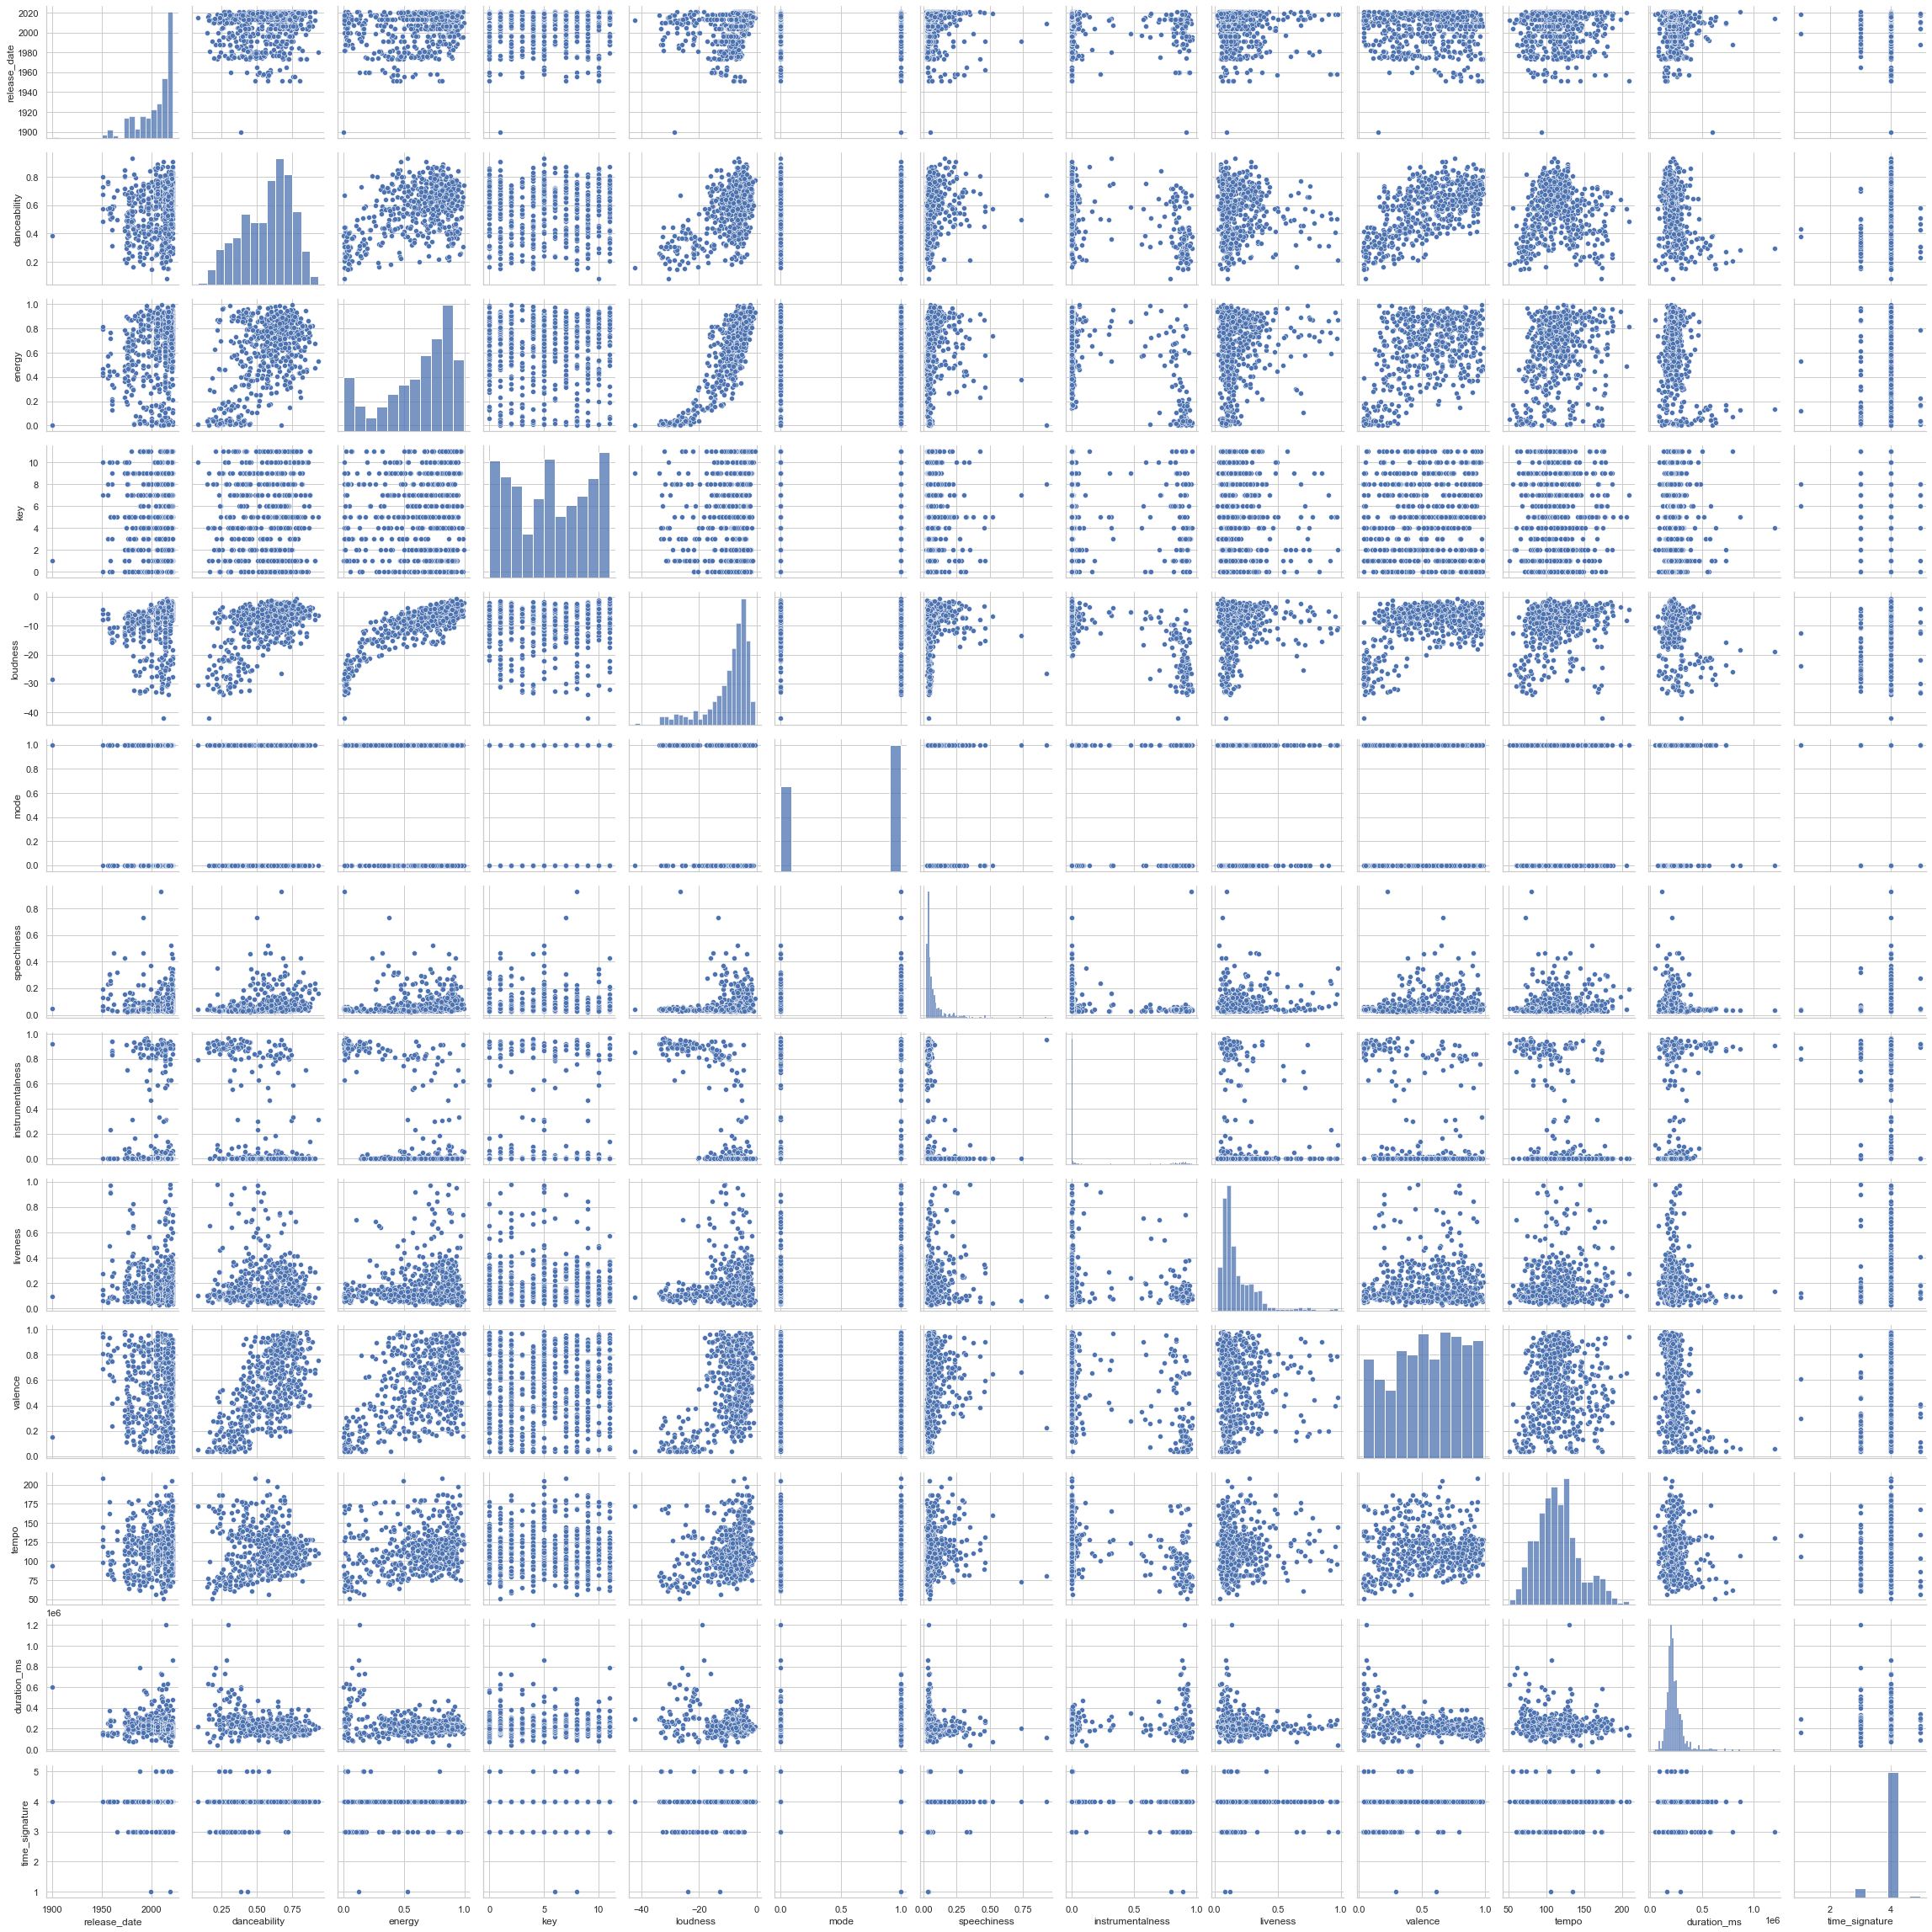

In [138]:
sns.pairplot(df)
plt.show()

### Plot conlcusions

Here there are some possible corralations such as: 

- Energy & Loudness
- Danceability & Valence
- Danceability & Energy

However, the correlations don't seem to be very c

<AxesSubplot:>

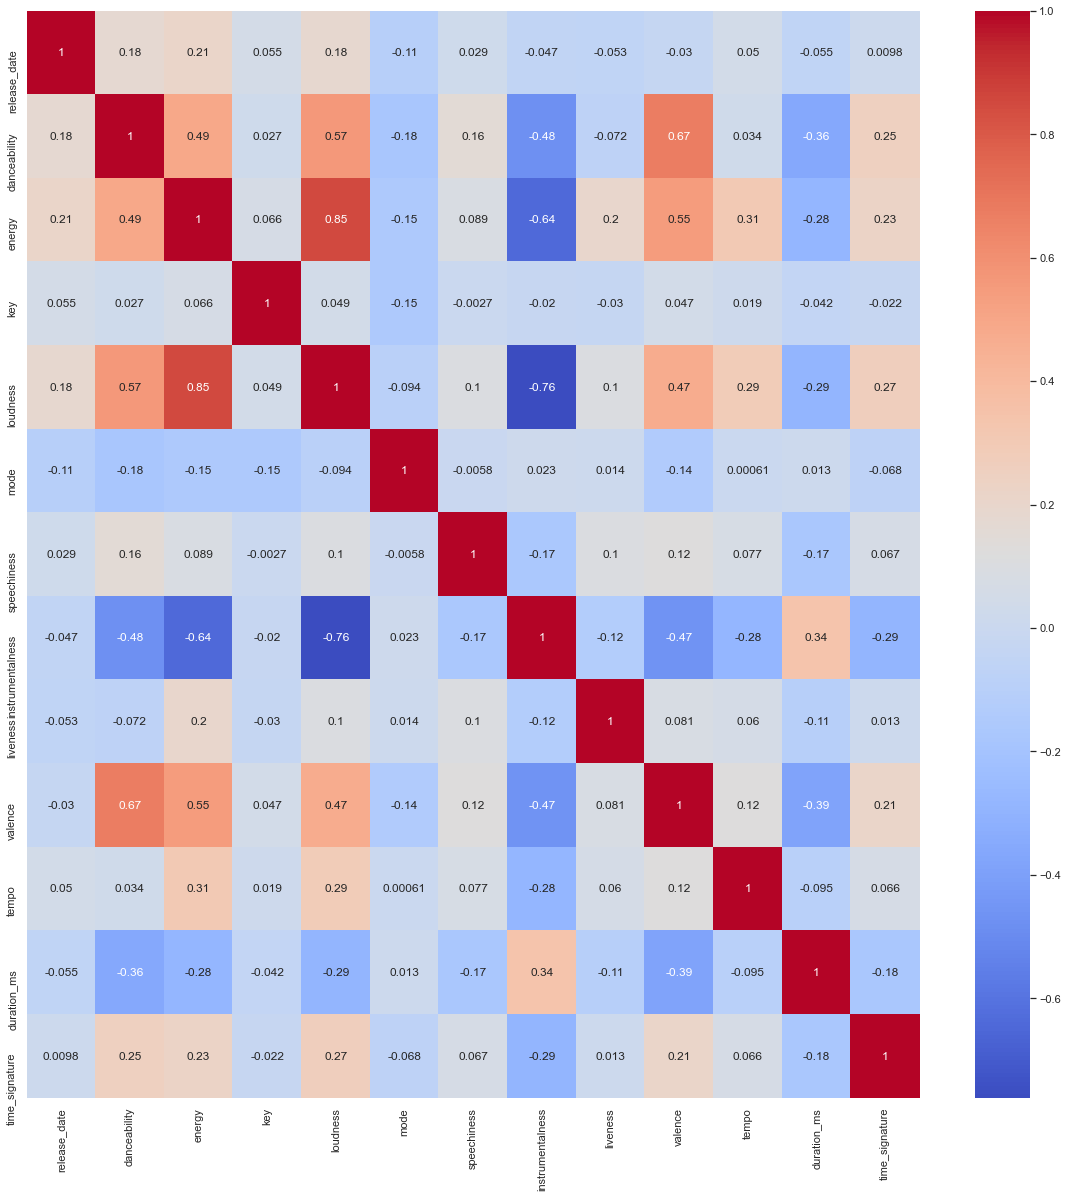

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


### Heat map

Thanks to the heatmap, we can check some correlations. 

- To my surprise the _release_date_ doesn't have as much correlations, or strong ones to any of rest of the variables. After comparing it with the means created in the next file, we can observe that variables such as danceability, energy, loudness or valence, don't depend that much on the year of the songs but probably on the style or artist.  

- Danceability and Valence still have a stronger relation with 0.67.

- Energy and Loudness are very related to each other with 0.85.

- And the rest are quite low to be significant.

We can also conclude that the _release_date_ might not play a big role on the feature-driven prediction.

The next lines of code are not really relevant for this analysis but I was interested to have an overview of the artists.


df[df['artist'] == "Queen"].describe()

df[df['artist'] == "Foo Fighters"].describe()

df[df['artist'] == "Frédéric Chopin"].describe()

df[df['artist'] == "Louis Prima"].describe()

df[df['artist'] == "Electric Light Orchestra"].describe()

df[df['artist'] == "Bob Sinclar"].describe()

In [1]:
fig = px.histogram(df, x="release_date", color="artist", marginal="box")
fig.show()

NameError: name 'px' is not defined

After analysing this artist-year graphic, it makes me think of two things:

1- That analysing the information of artists like Chopin does not make much sense as the release years cannot be accurate for artists like him. 

2- But it also confirms that, due to the proximity in the timeline or the lack of extreme extremes of genre have some kind of causation on the year.

That's why, we remove the variable 'release_date' for this study.

### Second data cleaning

After looking at the plots and the heat map, I find necessary a new data cleaning in which I remove some of the columns and focus on the ones with a higher correlation.

This will be our final dataset for the rest of the analysis and evaluation.


In [141]:
df = df[['artist', 'danceability', 'energy', "loudness", "valence", "tempo"]]
df

,artist,danceability,energy,loudness,valence,tempo
0,Queen,0.933,0.528,-6.472,0.754,109.967
1,Queen,0.414,0.404,-9.928,0.224,71.105
2,Queen,0.559,0.868,-5.276,0.609,156.295
3,Queen,0.671,0.712,-7.815,0.462,113.805
4,Queen,0.692,0.497,-7.316,0.475,81.308
...,...,...,...,...,...,...
606,Monsta X,0.677,0.889,-4.311,0.680,105.991
607,Monsta X,0.663,0.938,-2.233,0.889,122.006
608,Monsta X,0.616,0.899,-4.404,0.464,155.264
609,Monsta X,0.394,0.854,-3.628,0.531,138.580


### Graphics

After taking a look at the possible correlations and cleaning the data. I decided to switch the focus to the relation between artists and their variables. That way, we could have obtain a more visual representation of how each artist behaves within each of their variables.

#### Phase 2

Danceability was one of the variabiles that seem to play a bigger role. Let's analyse it. In the graphic below, w can definitely see a differentiation on the beats and where each of our artists stand.


In [142]:
fig = px.histogram(df, x="danceability", color="artist", marginal="box")
fig.show()

In [143]:
fig = px.histogram(df, x="energy", color="artist", marginal="box")
fig.show()

In [144]:
fig = px.histogram(df, x="valence", color="artist", marginal="box")
fig.show()

In [145]:
fig = px.histogram(df, x="loudness", color="artist", marginal="box")
fig.show()

### Graphs conclusion

After this histograms, we can visually have an representation on how the different artists are differentiated according to the different features (danceability, energy, valence, and loudness). These representations give us the hope to think that it would possible to create a scheme or scale to predict if a song belongs to one or another according to danceability, energy, and valence. However, these differences are more noticeable in extreme cases such as Chopin and Monsta X. 

Also, the more artists you add, the more complex it is to tell the difference among artists and features. We will see it clearer in the final prediction.

### Analysis focusing on danceability

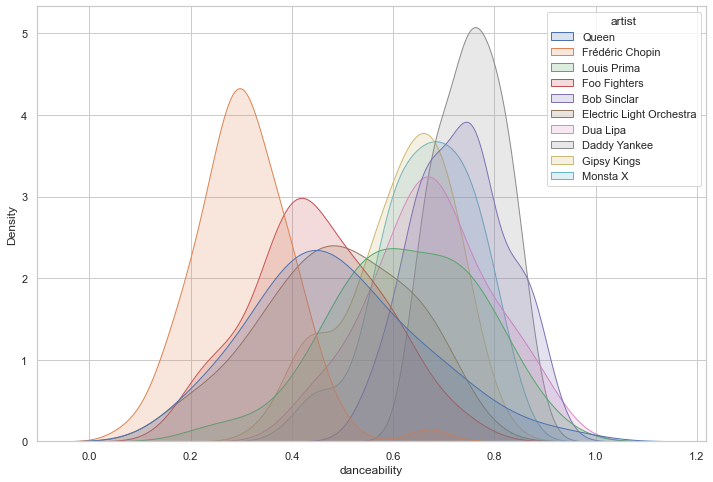

In [146]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine.data import diamonds # dataset

# Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8

# set seaborn whitegrid theme
sns.set(style="whitegrid")

# With transparency
sns.kdeplot(data=df, x="danceability", hue="artist", fill=True, common_norm=False, alpha=0.2)
plt.show()

Here again, we can see the two extremes clearer. On the orange curve we have Chopin, and on the right curve, artists such as ELO, Bob Sinclar, or Monsta X

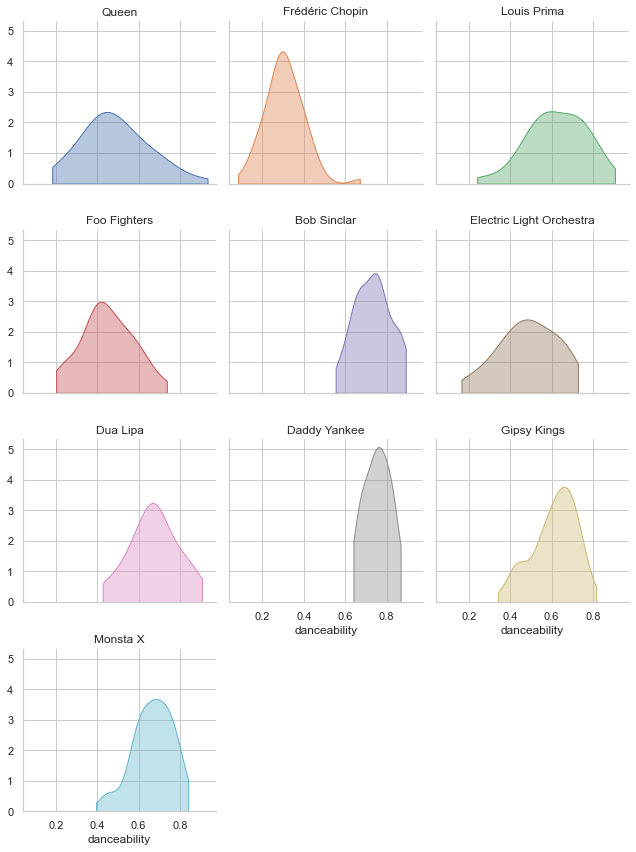

In [147]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine.data import diamonds  # dataset

# set seaborn whitegrid theme
sns.set(style="whitegrid")

# using small multiple
# create a grid 
g = sns.FacetGrid(df, col='artist', hue='artist', col_wrap=3)

# draw density plots
g = g.map(sns.kdeplot,"danceability", cut=0, fill=True, common_norm=False, alpha=0.4, legend=False)

# control the title of each facet
g = g.set_titles("{col_name}")

# show the graph
plt.show()

And again, how the different curves for each artist behaves differently. Very clear with Chopin or Daddy Yankee, and more ambiguous with Queen, Foo Fighters or Louis Prima for instance

### Plots for the new clean data

Let's see if our final variables provides better results


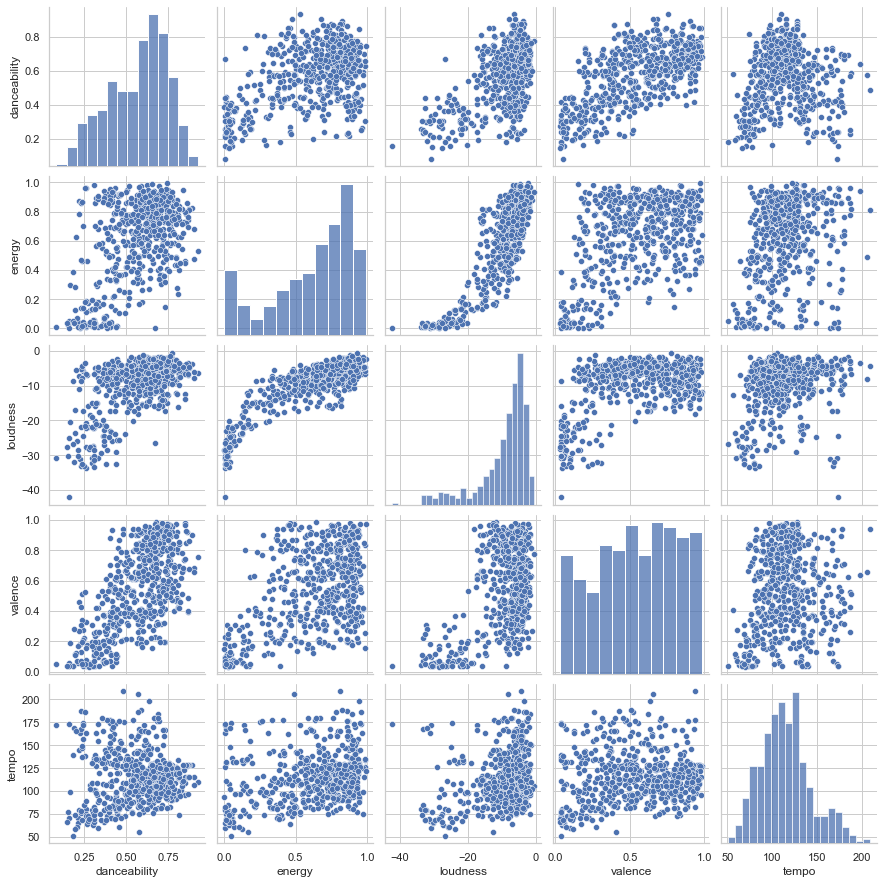

In [148]:
sns.pairplot(df)
plt.show()

### Plot Conclusion

In this case, correlations are most clearly seen in situations such as:

- Loudness and Energy
- Valence and Danceability

## Focused Plots


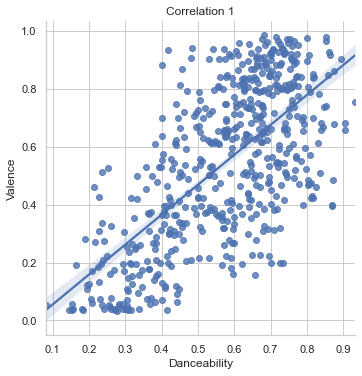

In [149]:
sns.lmplot(x='danceability', y='valence', data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Danceability') #use matplotlib to refine Seaborn plot
plt.ylabel('Valence')
plt.title('Correlation 1')
plt.show()

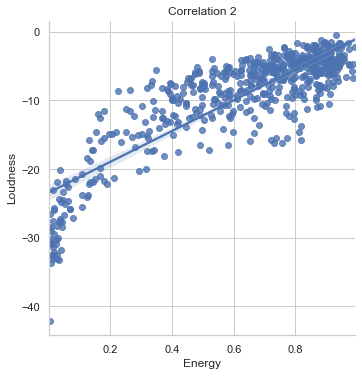

In [150]:
sns.lmplot(x='energy', y='loudness', data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Energy') #use matplotlib to refine Seaborn plot
plt.ylabel('Loudness')
plt.title('Correlation 2')
plt.show()

In [151]:
df['artist'].value_counts()

Monsta X                    98
Gipsy Kings                 95
Frédéric Chopin             66
Foo Fighters                50
Queen                       50
Electric Light Orchestra    49
Louis Prima                 49
Bob Sinclar                 42
Dua Lipa                    35
Daddy Yankee                27
Name: artist, dtype: int64

# Predictive Model

### K - nearest

We will use K-nearest as it is a sorting algorithm. And we will maintly determine the value of K (the neighbours), calculate the ditance to the training data, it will find the closest neighbours from that data, and finally predict the new data class.



In [152]:
from sklearn.preprocessing import normalize #get the function needed to normalize our data.

X = df[['danceability', 'energy', "loudness", "valence", "tempo"]] #create the X matrix
X = normalize(X) #normalize the matrix to put everything on the same scale
y = df['artist'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data (70/30), store it into different variables

df
        

,artist,danceability,energy,loudness,valence,tempo
0,Queen,0.933,0.528,-6.472,0.754,109.967
1,Queen,0.414,0.404,-9.928,0.224,71.105
2,Queen,0.559,0.868,-5.276,0.609,156.295
3,Queen,0.671,0.712,-7.815,0.462,113.805
4,Queen,0.692,0.497,-7.316,0.475,81.308
...,...,...,...,...,...,...
606,Monsta X,0.677,0.889,-4.311,0.680,105.991
607,Monsta X,0.663,0.938,-2.233,0.889,122.006
608,Monsta X,0.616,0.899,-4.404,0.464,155.264
609,Monsta X,0.394,0.854,-3.628,0.531,138.580


In [153]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.44970414201183434

### Accuracy comment

During the first code analysis, I decided to remove Chopin from the dataset as I considered that not matching its real year/time would give us bugs. However, after cleaning up my own code and process, I have realised that this does not mean that his music does not sound or have the exact corresponding values. So I added it back to the dataframe and I see that it may have had something to do with the final accuracy going up (minimally) from 41% to almost 45%.

I understand that this 4% is not going to make a big difference in the prediction result, but it makes me think that with the data obtained previously, that if more extreme cases in time or gender were selected, this percentage could be higher. Even if the number of artists in the dataframe were reduced, it would make life easier for the algorithm and therefore the prediction would be better. 

The latter also happened to me at the beginning of the study as I started by analysing only 5 artists and, if my memory serves me correctly, the percentage was a little over 50%. 

In [154]:
from sklearn.metrics import classification_report

for i in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = i)
    knn_new = knn_new.fit(X_train, y_train)
    y_test_pred_new = knn_new.predict(X_test)
    print(f"with {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new))

with 1 neighbors the result is:
                          precision    recall  f1-score   support

             Bob Sinclar       0.26      0.42      0.32        12
            Daddy Yankee       0.29      0.22      0.25         9
                Dua Lipa       0.17      0.20      0.18        10
Electric Light Orchestra       0.29      0.33      0.31        15
            Foo Fighters       0.29      0.17      0.21        12
         Frédéric Chopin       0.88      0.94      0.91        16
             Gipsy Kings       0.58      0.67      0.62        33
             Louis Prima       0.29      0.13      0.18        15
                Monsta X       0.57      0.59      0.58        29
                   Queen       0.40      0.33      0.36        18

                accuracy                           0.46       169
               macro avg       0.40      0.40      0.39       169
            weighted avg       0.45      0.46      0.45       169

with 2 neighbors the result is:
         

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [155]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[ 4,  0,  1,  0,  0,  0,  0,  0,  6,  1],
       [ 2,  2,  0,  0,  0,  0,  1,  0,  4,  0],
       [ 2,  1,  2,  0,  0,  0,  1,  1,  2,  1],
       [ 0,  0,  2,  4,  1,  1,  3,  4,  0,  0],
       [ 0,  0,  2,  4,  3,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0, 16,  0,  0,  0,  0],
       [ 0,  0,  2,  2,  0,  2, 23,  4,  0,  0],
       [ 1,  0,  0,  2,  0,  0,  8,  4,  0,  0],
       [ 7,  2,  1,  0,  3,  0,  2,  0, 14,  0],
       [ 2,  0,  1,  4,  2,  0,  4,  1,  0,  4]])

from sklearn.cluster import KMeans #The k-means algorithm

plt.figure(figsize=(10,10))
km = KMeans(n_clusters=9) #create a new k-means model with 3 clusters
X = df[['danceability', 'energy', "loudness", "valence"]] #get the X variables from the dataframe
km = km.fit(X) #calculate the cluster centers
df['cluster'] = km.predict(X) #predict the clusters of each observation and store in the dataframe
sns.scatterplot(data=df, x="danceability", y="energy", hue="artist", markers=True)
df.head()

In [156]:
conf_matrix = pd.DataFrame(cm, index=['Queen', 'Frédéric Chopin', 'Louis Prima', 'Foo Fighters', 'Bob Sinclar', 'Electric Light Orchestra',"Dua Lipa", "Daddy Yankee", "Monsta X", "Gipsy Kings"], columns = ['Queen_p', 'Frédéric Chopin_p', 'Louis Prima_p', 'Foo Fighters_p', 'Bob Sinclar_p', 'Electric Light Orchestra_p', "Dua Lipa_p", "Daddy Yankee_p", "Monsta X_p", "Gipsy Kings_p"]) 
conf_matrix

,Queen_p,Frédéric Chopin_p,Louis Prima_p,Foo Fighters_p,Bob Sinclar_p,Electric Light Orchestra_p,Dua Lipa_p,Daddy Yankee_p,Monsta X_p,Gipsy Kings_p
Queen,4,0,1,0,0,0,0,0,6,1
Frédéric Chopin,2,2,0,0,0,0,1,0,4,0
Louis Prima,2,1,2,0,0,0,1,1,2,1
Foo Fighters,0,0,2,4,1,1,3,4,0,0
Bob Sinclar,0,0,2,4,3,0,0,0,3,0
Electric Light Orchestra,0,0,0,0,0,16,0,0,0,0
Dua Lipa,0,0,2,2,0,2,23,4,0,0
Daddy Yankee,1,0,0,2,0,0,8,4,0,0
Monsta X,7,2,1,0,3,0,2,0,14,0
Gipsy Kings,2,0,1,4,2,0,4,1,0,4


## Random forest

On the other hand, I wanted to find out how Random Forest behaves because it is another classification method in which, it will take a random sample of our dataset, compare it, train it individually, and compare by taking the highest vote of those results.

In [157]:
#importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#initializing the RFC object
rfc = RandomForestClassifier(n_estimators=100)

#fitting the data
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [158]:
#making the predictions
predictions = rfc.predict(X_test)

In [159]:
#importing some reporting tools
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [160]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score

print("The model used is Random Forest classifier")
acc= accuracy_score(y_test,predictions)
print("The accuracy is  {}".format(acc))

The model used is Random Forest classifier
The accuracy is  0.6035502958579881


### Accuracy comment

With random forest I have achieved a higher percentage of accuracy, 60%. This could be due to the way the algorithms behave and analyse the data. But definitely Random Forest would give a more accurate prediction

In [161]:
print('classification report: ')
print('='*40)
print(classification_report(y_test,predictions))
print('\n')
print('confusion matrix: ')
print('='*40)
print(confusion_matrix(y_test,predictions))

classification report: 
                          precision    recall  f1-score   support

             Bob Sinclar       0.38      0.42      0.40        12
            Daddy Yankee       0.43      0.33      0.38         9
                Dua Lipa       0.43      0.30      0.35        10
Electric Light Orchestra       0.50      0.47      0.48        15
            Foo Fighters       0.50      0.33      0.40        12
         Frédéric Chopin       0.94      1.00      0.97        16
             Gipsy Kings       0.80      0.85      0.82        33
             Louis Prima       0.57      0.53      0.55        15
                Monsta X       0.47      0.59      0.52        29
                   Queen       0.61      0.61      0.61        18

                accuracy                           0.60       169
               macro avg       0.56      0.54      0.55       169
            weighted avg       0.60      0.60      0.60       169



confusion matrix: 
[[ 5  0  0  0  0  0  0  0  7

In [162]:
rfc.classes_

array(['Bob Sinclar', 'Daddy Yankee', 'Dua Lipa',
       'Electric Light Orchestra', 'Foo Fighters', 'Frédéric Chopin',
       'Gipsy Kings', 'Louis Prima', 'Monsta X', 'Queen'], dtype=object)

In [163]:
y_pred = rfc.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_pred) #creates a "confusion matrix"
cm = pd.DataFrame(cm, index=['Queen', 'Frédéric Chopin', 'Louis Prima', 'Foo Fighters', 'Bob Sinclar', 'Electric Light Orchestra',"Dua Lipa", "Daddy Yankee", "Monsta X", "Gipsy Kings"], columns = ['Queen_p', 'Frédéric Chopin_p', 'Louis Prima_p', 'Foo Fighters_p', 'Bob Sinclar_p', 'Electric Light Orchestra_p', "Dua Lipa_p", "Daddy Yankee_p", "Monsta X_p", "Gipsy Kings_p"]) #label and make df
cm

,Queen_p,Frédéric Chopin_p,Louis Prima_p,Foo Fighters_p,Bob Sinclar_p,Electric Light Orchestra_p,Dua Lipa_p,Daddy Yankee_p,Monsta X_p,Gipsy Kings_p
Queen,5,0,0,0,0,0,0,0,7,0
Frédéric Chopin,1,3,0,0,0,0,1,0,4,0
Louis Prima,1,1,3,0,0,0,0,1,4,0
Foo Fighters,0,0,0,7,0,1,1,1,0,5
Bob Sinclar,1,0,0,1,4,0,0,1,3,2
Electric Light Orchestra,0,0,0,0,0,16,0,0,0,0
Dua Lipa,0,0,1,1,1,0,28,2,0,0
Daddy Yankee,1,0,0,3,0,0,3,8,0,0
Monsta X,4,3,3,0,2,0,0,0,17,0
Gipsy Kings,0,0,0,2,1,0,2,1,1,11


In [164]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

             Bob Sinclar       0.38      0.42      0.40        12
            Daddy Yankee       0.43      0.33      0.38         9
                Dua Lipa       0.43      0.30      0.35        10
Electric Light Orchestra       0.50      0.47      0.48        15
            Foo Fighters       0.50      0.33      0.40        12
         Frédéric Chopin       0.94      1.00      0.97        16
             Gipsy Kings       0.80      0.85      0.82        33
             Louis Prima       0.57      0.53      0.55        15
                Monsta X       0.47      0.59      0.52        29
                   Queen       0.61      0.61      0.61        18

                accuracy                           0.60       169
               macro avg       0.56      0.54      0.55       169
            weighted avg       0.60      0.60      0.60       169



In [165]:
y_pred_prob = rfc.predict_proba(X_test) #Instead of classes, we now get the probabilities
y_pred_prob

array([[0.03, 0.  , 0.03, ..., 0.1 , 0.01, 0.35],
       [0.  , 0.  , 0.  , ..., 0.53, 0.  , 0.01],
       [0.18, 0.  , 0.22, ..., 0.  , 0.52, 0.05],
       ...,
       [0.  , 0.02, 0.  , ..., 0.13, 0.  , 0.05],
       [0.  , 0.05, 0.03, ..., 0.03, 0.09, 0.07],
       [0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ]])

# Conclusion

To conclude, in terms of prediction, it is clear that by training our dataset with random forest, the accuracy result is almost 15% more accurate and could be used to predict artists but it does not guarantee a high final satisfaction in the result. 

This may be due to factors already mentioned as well as the lack of extremes in the style of the artists or because of the similarities that some of them share in their characteristics. To check whether by adding even more artists the algorithm would be better trained to shuffle more examples or whether, on the contrary, it would be more confusing to differentiate between them. 

On the other hand, the variables that the Spotify API offers us are quite accurate when classifying the characteristics of the songs and, as we have seen, it is possible that we can use some of them to define an artist in a summarised way. However, perhaps adding a more specific/obvious variable such as the artist's style (pop, rock, techno, classical...) or whether it is a single artist or group, could help our algorithm.